#  IMAGE PROCESSING

In [1]:
# LOAD IMAGE TO NOTEBOOK & RESIZE IT 
from PIL import Image
import matplotlib.pyplot as plt
file_path = 'C:\\lavanhoa\\quantum\\Proj\\mnist0.jpg'
img = Image.open(file_path)
# Use 10 qubits-- 2^6 = 64
newsize = (64,64)
img = img.resize(newsize)
img = img.save('resized_mnist0.jpg')

The Shape of the image is: (64, 64, 3)


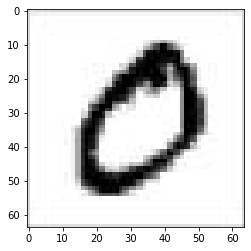

In [2]:
img=plt.imread('resized_mnist0.jpg')
print('The Shape of the image is:',img.shape)
plt.imshow(img)


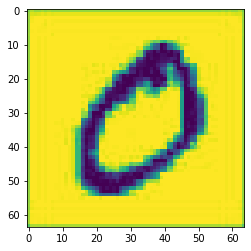

In [3]:
# CONVERT RGB IMAGE TO GRAY
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
img= rgb2gray(img)
plt.imshow(img)


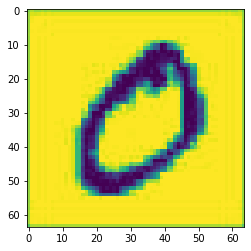

In [4]:
plt.imshow(img)

In [5]:
import numpy as np

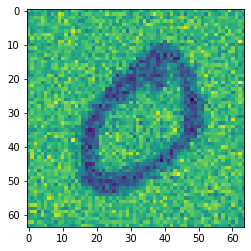

In [6]:
# ADD GAUSSIAN NOISE TO IMAGE 
noise = np.random.normal(10,60,img.shape)
img_with_noise = img+noise
plt.imshow(img_with_noise)

In [7]:
# FUNCTION TO GET THE IMAGE AND PROCESS IT 
#def process_img(img):
    

In [8]:
img_with_noise.shape

(64, 64)

# RUN QUANTUM QISKIT 

In [9]:

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator


# RUN USING REAL QUBIT -- QISKIT BACKEND 
TOKEN='13c09bd6bcd75f7510d5e9bde97dedd79d783a9e708000d317c385fa2f81b9229f4d3ec0844cf77e1e664b61cbc861ea8b87b6c5cca367b61e5f9d514a3c1316'
IBMQ.save_account(TOKEN)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
for backend in provider.backends():
    try:
        qubit_count= len(backend.properties().qubits)
    except:
        qubit_count="simulated"
    print(f"{backend.name} has {backend.status().pending_jobs} queued {qubit_count} qubits")

# Incomplete code 
from qiskit.tools.monitor import job_monitor 
backend = provider.get_backend('')
job = IBMQ.execute(###, backend = backend)
job_monitor(job)
    

In [10]:
from scipy import optimize

In [11]:
#circuit1 WITH 10 QUBITS

from qiskit.circuit import QuantumCircuit, ParameterVector

###BUILD CIRCUIT1
circuit1 = QuantumCircuit(6)
params1 = ParameterVector('P1',24)

for i in range(6):
    circuit1.rx(params1[i],i)
    circuit1.rz(params1[i+6],i)
for i in range(5,0,-1):
    circuit1.cnot(i,i-1)
for i in range(6):
    circuit1.rx(params1[i+12],i)
    circuit1.rz(params1[i+18],i)
for i in range(5,0,-1):
    circuit1.cnot(i,i-1)


circuit1.draw()


┌───────────┐┌───────────┐                                                »
q_0: ┤ Rx(P1[0]) ├┤ Rz(P1[6]) ├────────────────────────────────────────────────»
     ├───────────┤├───────────┤                                      ┌───┐     »
q_1: ┤ Rx(P1[1]) ├┤ Rz(P1[7]) ├──────────────────────────────────────┤ X ├─────»
     ├───────────┤├───────────┤                        ┌───┐         └─┬─┘     »
q_2: ┤ Rx(P1[2]) ├┤ Rz(P1[8]) ├────────────────────────┤ X ├───────────■───────»
     ├───────────┤├───────────┤          ┌───┐         └─┬─┘     ┌────────────┐»
q_3: ┤ Rx(P1[3]) ├┤ Rz(P1[9]) ├──────────┤ X ├───────────■───────┤ Rx(P1[15]) ├»
     ├───────────┤├───────────┴┐┌───┐    └─┬─┘     ┌────────────┐├────────────┤»
q_4: ┤ Rx(P1[4]) ├┤ Rz(P1[10]) ├┤ X ├──────■───────┤ Rx(P1[16]) ├┤ Rz(P1[22]) ├»
     ├───────────┤├────────────┤└─┬─┘┌────────────┐├────────────┤└────────────┘»
q_5: ┤ Rx(P1[5]) ├┤ Rz(P1[11]) ├──■──┤ Rx(P1[17]) ├┤ Rz(P1[23]) ├──────────────»
     └───────────┘└────────────┘     └────────────┘└────────────┘              »
«         ┌───┐     ┌────────────┐┌────────────┐     ┌───┐
«q_0: ────┤ X ├─────┤ Rx(P1[12]) ├┤ Rz(P1[18]) ├─────┤ X ├
«         └─┬─┘     ├────────────┤├────────────┤┌───┐└─┬─┘
«q_1: ──────■───────┤ Rx(P1[13]) ├┤ Rz(P1[19]) ├┤ X ├──■──
«     ┌────────────┐├────────────┤└───┬───┬────┘└─┬─┘     
«q_2: ┤ Rx(P1[14]) ├┤ Rz(P1[20]) ├────┤ X ├───────■───────
«     ├────────────┤└───┬───┬────┘    └─┬─┘               
«q_3: ┤ Rz(P1[21]) ├────┤ X ├───────────■─────────────────
«     └───┬───┬────┘    └─┬─┘                             
«q_4: ────┤ X ├───────────■───────────────────────────────
«         └─┬─┘                                           
«q_5: ──────■─────────────────────────────────────────────
«

In [12]:
#circuit2 giong circuit1

###BUILD CIRCUIT2
circuit2 = QuantumCircuit(6)
params2 = ParameterVector('P2',24)

for i in range(6):
    circuit2.rx(params2[i],i)
    circuit2.rz(params2[i+6],i)
for i in range(5,0,-1):
    circuit2.cnot(i,i-1)
for i in range(6):
    circuit2.rx(params2[i+12],i)
    circuit2.rz(params2[i+18],i)
for i in range(5,0,-1):
    circuit2.cnot(i,i-1)


circuit2.draw()


┌───────────┐┌───────────┐                                                »
q_0: ┤ Rx(P2[0]) ├┤ Rz(P2[6]) ├────────────────────────────────────────────────»
     ├───────────┤├───────────┤                                      ┌───┐     »
q_1: ┤ Rx(P2[1]) ├┤ Rz(P2[7]) ├──────────────────────────────────────┤ X ├─────»
     ├───────────┤├───────────┤                        ┌───┐         └─┬─┘     »
q_2: ┤ Rx(P2[2]) ├┤ Rz(P2[8]) ├────────────────────────┤ X ├───────────■───────»
     ├───────────┤├───────────┤          ┌───┐         └─┬─┘     ┌────────────┐»
q_3: ┤ Rx(P2[3]) ├┤ Rz(P2[9]) ├──────────┤ X ├───────────■───────┤ Rx(P2[15]) ├»
     ├───────────┤├───────────┴┐┌───┐    └─┬─┘     ┌────────────┐├────────────┤»
q_4: ┤ Rx(P2[4]) ├┤ Rz(P2[10]) ├┤ X ├──────■───────┤ Rx(P2[16]) ├┤ Rz(P2[22]) ├»
     ├───────────┤├────────────┤└─┬─┘┌────────────┐├────────────┤└────────────┘»
q_5: ┤ Rx(P2[5]) ├┤ Rz(P2[11]) ├──■──┤ Rx(P2[17]) ├┤ Rz(P2[23]) ├──────────────»
     └───────────┘└────────────┘     └────────────┘└────────────┘              »
«         ┌───┐     ┌────────────┐┌────────────┐     ┌───┐
«q_0: ────┤ X ├─────┤ Rx(P2[12]) ├┤ Rz(P2[18]) ├─────┤ X ├
«         └─┬─┘     ├────────────┤├────────────┤┌───┐└─┬─┘
«q_1: ──────■───────┤ Rx(P2[13]) ├┤ Rz(P2[19]) ├┤ X ├──■──
«     ┌────────────┐├────────────┤└───┬───┬────┘└─┬─┘     
«q_2: ┤ Rx(P2[14]) ├┤ Rz(P2[20]) ├────┤ X ├───────■───────
«     ├────────────┤└───┬───┬────┘    └─┬─┘               
«q_3: ┤ Rz(P2[21]) ├────┤ X ├───────────■─────────────────
«     └───┬───┬────┘    └─┬─┘                             
«q_4: ────┤ X ├───────────■───────────────────────────────
«         └─┬─┘                                           
«q_5: ──────■─────────────────────────────────────────────
«

In [13]:
#A PLUG VAO SAU KHI CO IMG WITH NOISE 
A=img_with_noise

In [14]:
from qiskit.quantum_info import Operator


In [85]:
%%time
# FUNCTION 
x=np.ones(circuit1.num_parameters+circuit2.num_parameters)
def func(x, *args):
    A, qc1, qc2 = args
    a = x[:qc1.num_parameters]
    b = x[qc1.num_parameters:]
    U = Operator(qc1.bind_parameters(a)).data
    V = Operator(qc2.bind_parameters(b)).data
    dim = 2**qc1.num_qubits
    #Optimize la optimize cai tong 
    s = 0
    for i in range(dim):
        m = np.real(U[:,i].conj().T @ A @ V[:,i])
        s += m
    return -s
result = optimize.minimize(func,x, (A, circuit1, circuit2),method="Powell")
a= result.x[:circuit1.num_parameters]
b=result.x[circuit1.num_parameters:]
bound_circuit1 = circuit1.bind_parameters(a)
bound_circuit2=circuit2.bind_parameters(b)
from qiskit.quantum_info import Operator
circuit1_op = Operator(bound_circuit1)
circuit1_matrix = circuit1_op.data
circuit2_op = Operator(bound_circuit2)
circuit2_matrix = circuit2_op.data
u=[]
v=[]
for i in range(16):
    u.append(circuit1_matrix[i])
    v.append(circuit2_matrix[i])
m=[]
for i in range(16):
    m.append(np.real( u[i].conj().T@A@v[i] ))
d=sorted(m)
d=reverse_order = np.sort(d)[::-1]


CPU times: total: 9min 13s
Wall time: 10min 55s


In [86]:
m

[-93.3089631415319,
 -75.37129019251135,
 -133.1930760864912,
 -101.71211844187575,
 -123.95452323558298,
 -294.98856573969164,
 -116.20212068254122,
 -261.3864348997154,
 100.98930848944632,
 46.69213551300914,
 104.12312761608777,
 102.56716014735889,
 60.565886411167504,
 135.24654219375282,
 54.04458403119594,
 81.23451518492956]

In [87]:
# Sort Max to min 
d

array([ 135.24654219,  104.12312762,  102.56716015,  100.98930849,
         81.23451518,   60.56588641,   54.04458403,   46.69213551,
        -75.37129019,  -93.30896314, -101.71211844, -116.20212068,
       -123.95452324, -133.19307609, -261.3864349 , -294.98856574])

# PICK SINGULAR VALUES


In [88]:
#https://www.geeksforgeeks.org/how-to-get-the-indices-of-the-sorted-array-using-numpy-in-python/#:~:text=We%20can%20get%20the%20indices,help%20of%20argsort()%20method.
#https://stackoverflow.com/questions/30576797/how-to-sort-a-numpy-array-into-a-specific-order-specified-by-a-separate-list-b



# Get the indices/ indexes of the sorted singular values to apply for the singular vectors
indices = np.argsort(m)
indices= np.sort(indices)[::-1]

# Xu li data type cua u,v 
u=np.array(u)
v=np.array(v)

#Process lai v 
v=v.conj().T

#Apply to the singular vectors
u=u[:,indices]
v=v[indices,:]

# Lay k gia tri ban dau : phan con lai thi bo 
k= 5 ###
d=d[:k]
u=u[:,:k]
v=v[:k,:]

In [100]:
v.shape

(5, 16)

In [101]:
# Tao ra matrix sigma tu d 
sigma_matrix = np.zeros((5,5))
np.fill_diagonal(sigma_matrix,d)
sigma_matrix.shape

(5, 5)

# RECONSTRUCT

In [102]:
#u,d,v (d la new singular values of m)
#g la new matrix/ new image 

g= u@ sigma_matrix@v
g.shape

(16, 16)

TypeError: Image data of dtype complex128 cannot be converted to float

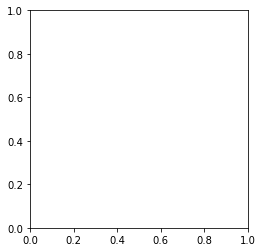

In [105]:
plt.imshow(g)